In [ ]:
%pip install matplotlib scipy pandas

In [16]:

import pandas as pd

df = pd.read_csv("edit_history.txt", sep='\t', header=None, names=["Title", "Edit DateTime", "Probe DateTime"])
df['Edit DateTime'] = pd.to_datetime(df['Edit DateTime'])
df['Probe DateTime'] = pd.to_datetime(df['Probe DateTime'])
# Sort the DataFrame by 'Title' and 'Edit DateTime' to ensure the deltas are calculated correctly
df = df.sort_values(by=['Title', 'Edit DateTime'])
# Calculate the time deltas for consecutive edits within the same title
df['Time Delta'] = df.groupby('Title')['Edit DateTime'].diff()
# Remove rows with not-a-time (NaT) values in the 'Time Delta' column
df = df.dropna(subset=['Time Delta'])
df[df['Title'] == 'Marie_Cochran'].head()

,Title,Edit DateTime,Probe DateTime,Time Delta
48,Marie_Cochran,2018-03-10 19:21:00,2024-02-08 01:16:00,0 days 00:01:00
47,Marie_Cochran,2018-03-10 19:22:00,2024-02-08 01:16:00,0 days 00:01:00
46,Marie_Cochran,2018-03-10 19:24:00,2024-02-08 01:16:00,0 days 00:02:00
45,Marie_Cochran,2018-03-10 19:25:00,2024-02-08 01:16:00,0 days 00:01:00
43,Marie_Cochran,2018-03-10 19:30:00,2024-02-08 01:16:00,0 days 00:05:00


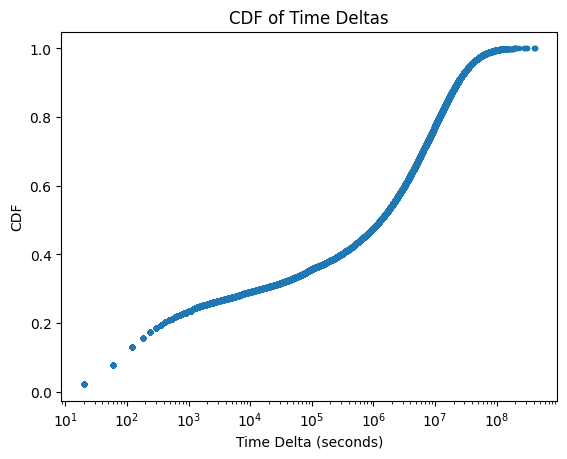

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Convert 'Time Delta' to total seconds and sort the values
data = df['Time Delta'].dt.total_seconds().sort_values()
data = data.clip(lower=20)

# Calculate the CDF for each data point
cdf = data.rank(method='average', pct=True)  # This computes the rank as a percentage

# Plot the CDF
plt.plot(data, cdf, marker='.', linestyle='none')
plt.xlabel('Time Delta (seconds)')
plt.ylabel('CDF')
plt.title('CDF of Time Deltas')
plt.xscale('log')
plt.show()


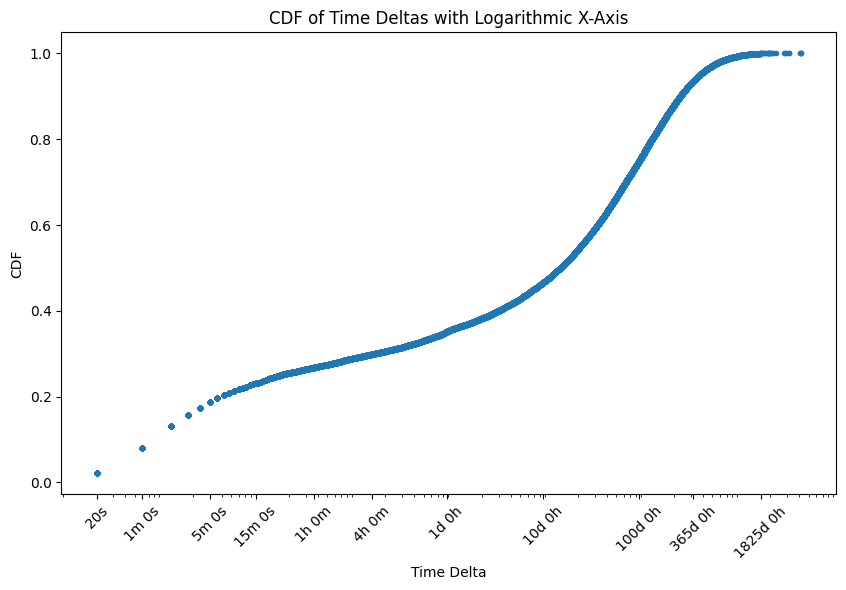

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Function to convert seconds to a more readable time format
def format_seconds_to_time(seconds):
    days = seconds // (24 * 3600)
    seconds %= (24 * 3600)
    hours = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
    if days > 0:
        return f'{int(days)}d {int(hours)}h'
    elif hours > 0:
        return f'{int(hours)}h {int(minutes)}m'
    elif minutes > 0:
        return f'{int(minutes)}m {int(seconds)}s'
    else:
        return f'{int(seconds)}s'

# Plot the CDF with a logarithmic x-axis
plt.figure(figsize=(10, 6))
plt.plot(data, cdf, marker='.', linestyle='none')
plt.xlabel('Time Delta')
plt.ylabel('CDF')
plt.title('CDF of Time Deltas with Logarithmic X-Axis')

# Set the x-axis to a logarithmic scale
plt.xscale('log')

# Custom tick labels
ticks = [20, 60, 60*5, 60*15, 3600, 3600*4, 86400, 86400 * 10, 86400 * 100, 86400 * 365, 86400 * 365 *5]  # Example tick positions (in seconds)
tick_labels = [format_seconds_to_time(tick) for tick in ticks]

plt.xticks(ticks, tick_labels, rotation=45)
# plt.grid(True, which="both", ls="--")
plt.show()
